<a href="https://colab.research.google.com/github/SergioPedroso/Doen-as_Coron-rias_Modelo_Classifica-o/blob/main/Assignment_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Informações do Dataset

- age: Idade (Anos)
- sex: Sexo (1 = Masc e 0 = Fem)
- cp: Nível de dor ( 1 a 4 )
- trestbps: Pressão sanguínea em Repouso
- chol: colesterol em mg/dl: 
- fbs: Fasting Blood Sugar (Teste diabético) > 120 mg/dl
- restecg: Eletrocardiogramas em repouso (0,1 ou 2)
- thalach: Ritmo cardíaco
- exang: Exercício físico que gerou Angina
- oldpeak: Depressão de ST induzida por exercício em relação ao 
repouso
- slope: Tipo de inclinação do segmento ST de pico do exercício
-  ca:  número  de  vasos  sanguínios  ressaltados  (coloridos  por 
fluoroscopia)
- thal: Talassemia -> 3 = normal; 6 = fixed defect; 7 = reversable 
defect

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
pd.options.display.float_format = "{:,.2f}".format

EDA 

In [2]:
from google.colab import files
upload = files.upload()

Saving heart.csv to heart.csv


In [3]:
df = pd.read_csv(r'heart.csv')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.40,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.30,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.00,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.50,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.60,2,0,2,1


In [4]:
print(df.shape)
df.describe()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


Mostrando os tipos de dados do Dataset

In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Verificando  se há algum valor ausente:

In [6]:
df.isna().sum()

#Conforme mostra o Output não há valores ausentes. 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Agora vamos  criar uma matriz de correlação para ver quais recursos têm mais efeito no valor alvo:**

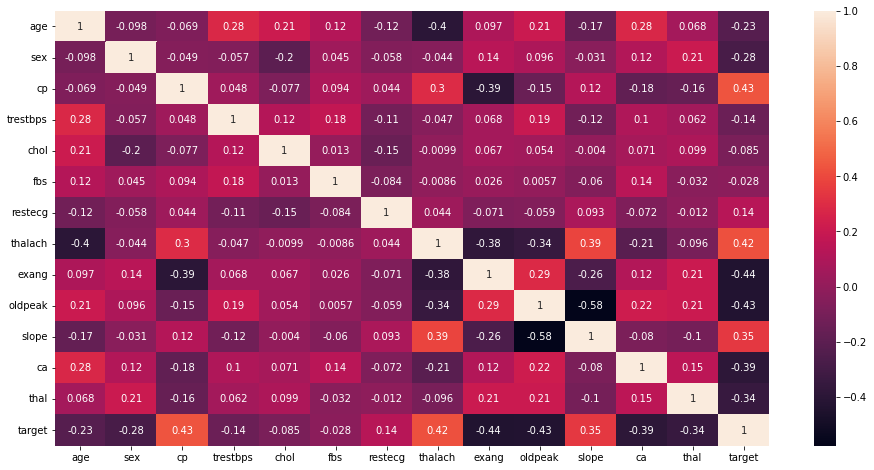

In [7]:
import seaborn as sns
plt.figure(figsize = (16, 8))

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot = True)
plt.show()

Parece que "cp", "thalach", "slope" e "restepg" têm mais correlação com o valor alvo. mas, como vemos na matriz, "thalach" e "declive" têm uma correlação considerável entre si, e vemos a mesma coisa para "cp" e "thalach", então provavelmente devemos ter cuidado com a multicolinearidade. (neste bloco de notas, usarei todos os recursos para prever o valor alvo)

**Agora vizualizar por meio do graficos de Pares. **

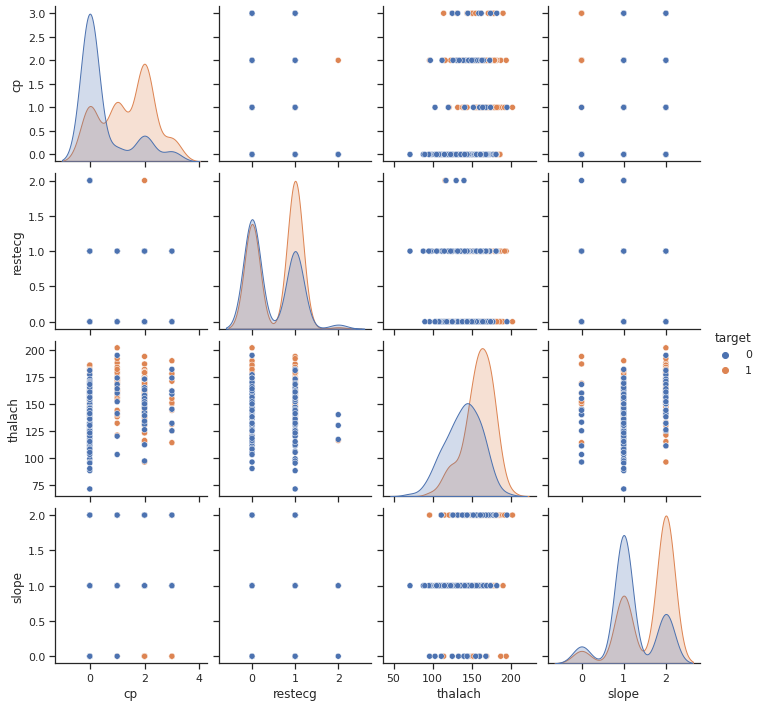

In [8]:
df_subset = df[["target","cp", "restecg", "thalach", "slope"]]

sns.set_theme(style="ticks")
sns.pairplot(df_subset, hue="target")

conforme demostra nos  gráficos de pares, os quatro recursos têm distribuições diferentes para cada classe de destino. 
 CP = Nivel de Dor (1- 4). 
 Restecg = Eletrocardiogramas em Repouso (0,1 ou 0,2).
 Thalach = Ritmo Cardíaco. 
 Slope = Tipo de Inclinação do segmento ST de pico do exercicio. 

##Aplicando modelo de classificação



In [10]:
X=df.drop('target',axis=1).values    
y=df['target'].values

In [11]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

Scaler = preprocessing.StandardScaler().fit(X)
X = Scaler.transform(X)
X[0:3]

array([[ 0.9521966 ,  0.68100522,  1.97312292,  0.76395577, -0.25633371,
         2.394438  , -1.00583187,  0.01544279, -0.69663055,  1.08733806,
        -2.27457861, -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, -0.09273778,  0.07219949,
        -0.41763453,  0.89896224,  1.63347147, -0.69663055,  2.12257273,
        -2.27457861, -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, -0.09273778, -0.81677269,
        -0.41763453, -1.00583187,  0.97751389, -0.69663055,  0.31091206,
         0.97635214, -0.71442887, -0.51292188]])

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=7)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (212, 13) (212,)
Test set: (91, 13) (91,)


In [23]:
#import da Biblioteca KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier

####KNN com K = 4

In [24]:
k = 4
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [25]:
knn_yhat = knn.predict(X_test)
knn_yhat[0:5]

array([1, 0, 1, 1, 1])

##Avaliando modelo

In [26]:
from sklearn import metrics
KNN_Score = metrics.accuracy_score(y_test, knn_yhat)                                               
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(X_train)))
print("Test set Accuracy: ",KNN_Score )

Train set Accuracy:  0.8867924528301887
Test set Accuracy:  0.8241758241758241


In [27]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=knn.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.78021978, 0.76923077, 0.79120879, 0.82417582, 0.78021978,
       0.83516484, 0.78021978, 0.79120879, 0.79120879])

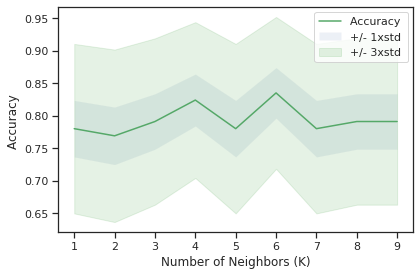

In [28]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

K ótimo = 6

In [31]:
k = 6
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [32]:
knn_yhat = knn.predict(X_test)
knn_yhat[0:5]

array([1, 1, 1, 1, 1])